数据加载

In [5]:
import numpy as np
import os

def load_data(root):
    path_list = [path for path in os.listdir(root)]
    data = []
    label = []
    for data_path in path_list:
        data_org = np.load(os.path.join(root, data_path))
        if data_path[1] == '3':  # 1: hard fall 2: soft fall 3: non-fall
            lb = 0
        else:
            lb = 1
        data.append(data_org)
        label.append(lb)
    return np.array(data),np.array(label)

if __name__=='__main__':
    os.chdir('/tmp/FYP/12_DTweighted')

    ROOT = '/tmp/FYP/12_DTweighted/'
    train_path = ROOT + 'train/'
    test_path = ROOT + 'test/'
    trainX,trainy = load_data(train_path)
    testX,testy = load_data(test_path)

    print(load_data(train_path))
    print(load_data(test_path))
    
    print("data loaded")

(array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0

分析数据维度：二维数组（128,64），8192个数据点
数据文件命名:
1.data_path[1] 代表hard, soft, non-fall
2.data_path[2] 和 data_path[3]两位代表28个属性
3.数据集里面Hard:1-9, soft:10-14, non-fall:15-28

In [15]:
data_example = np.load('/tmp/FYP/12_DTweighted/train/4101010001210420_1_001_DTweighted.npy')

out_file_path = 'data.txt'
with open(out_file_path,'w') as f:
    f.write(np.array2string(data_example, threshold=np.inf))

print("Printed!")
print("Array Shape:",data_example.shape)
print("Data Shape:",data_example.dtype)

with open(out_file_path,'r') as file:
    content = file.read()
    print(content)


Printed!
Array Shape: (128, 64)
Data Shape: float64
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          

取一个示例数据，做出Doppler-Time map

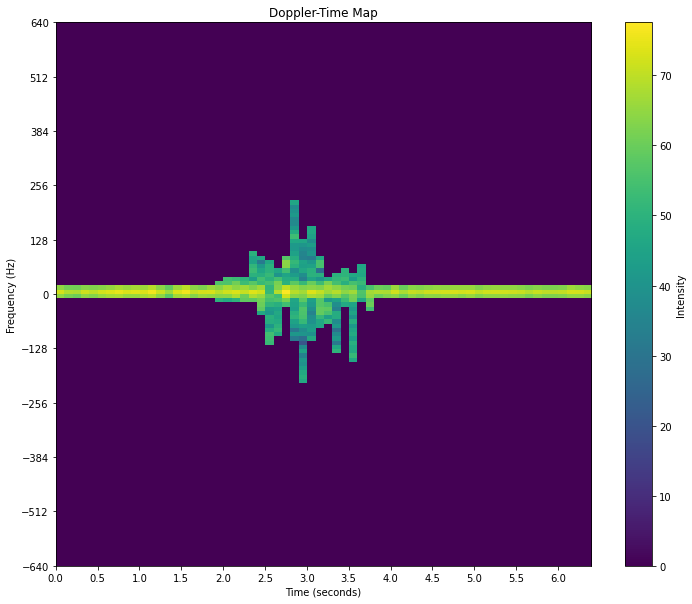

In [14]:
import matplotlib.pyplot as plt

# 加载.npy文件
data_train_example = np.load('/tmp/FYP/12_DTweighted/train/4101010001210420_1_001_DTweighted.npy')  # 使用实际路径替换

# 设置时间轴，假设每十个数据点代表1秒，总共有64个数据点
time_ticks = np.linspace(0, 6.4, 64)  # 64个数据点，最大值为6.4秒

# 设置频率轴，从-640 Hz到+640 Hz，总共128个数据点
frequency_ticks = np.linspace(-640, 640, 128)

# 创建图像并设置大小
plt.figure(figsize=(12, 10))

# 绘制Doppler-time map
plt.imshow(data_train_example, aspect='auto', cmap='viridis', interpolation='none',
           extent=[time_ticks.min(), time_ticks.max(), frequency_ticks.min(), frequency_ticks.max()])

# 设置颜色条和标题
plt.colorbar(label='Intensity')
plt.title('Doppler-Time Map')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')

# 调整刻度密度
plt.xticks(np.arange(0, time_ticks.max(), 0.5))
plt.yticks(np.arange(frequency_ticks.min(), frequency_ticks.max()+1, 128))

# 保存图像，使用较高的dpi值
plt.savefig('doppler_time_map_high_res.png', dpi=300)  # 使用高分辨率保存

plt.show()